# Mobile Health Human Behavior Analysis

# Context
The MHEALTH (Mobile HEALTH) dataset comprises body motion and vital signs recordings for ten volunteers of diverse profile while performing several physical activities. Sensors placed on the subject's chest, right wrist and left ankle are used to measure the motion experienced by diverse body parts, namely, acceleration, rate of turn and magnetic field orientation. The sensor positioned on the chest also provides 2-lead ECG measurements, which can be potentially used for basic heart monitoring, checking for various arrhythmias or looking at the effects of exercise on the ECG.

### source
https://www.kaggle.com/datasets/gaurav2022/mobile-health

### Import library yang diperlukan
- pandas untuk membuat df
- untuk manipulasi numerik atau array
- sklearn untuk menguji, test, normalisasi, memprediksi, menghitung data
- seaborn untuk grafik
- matplotlib untuk gambar



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Membaca dataset

Pada kolom itu ada alx, glx, ary, gry dan sebagainya, penjelasansingkat aja nih boy:
- a itu adalah rekaman akselerasi linier (Acceleration)
- g itu adalah rekaman laju perubahan sudut (Gyroscope)
- l adalah bagian kaki
- r adalah bagian tangan
- x, y, z itu adalah sumbu

In [2]:
dataset_path = "~/Documents/DataSet/mhealth_raw_data.csv"
columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'Activity', 'subject']
df = pd.read_csv(dataset_path, names=columns)

df.head()

/tmp/ipykernel_352664/581193314.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, names=columns)


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1,2.1849,-9.6967,0.6307699999999999,0.1039,-0.8405299999999999,-0.68762,-8.6499,-4.5781,0.18775999999999998,-0.44902,-1.0103,0.034483,0,subject1
2,2.3876,-9.508,0.68389,0.08534299999999999,-0.83865,-0.6836899999999999,-8.6275,-4.3198,0.023594999999999998,-0.44902,-1.0103,0.034483,0,subject1
3,2.4086,-9.5674,0.68113,0.08534299999999999,-0.83865,-0.6836899999999999,-8.5055,-4.2772,0.27571999999999997,-0.44902,-1.0103,0.034483,0,subject1
4,2.1814,-9.4301,0.5503100000000001,0.08534299999999999,-0.83865,-0.6836899999999999,-8.6279,-4.3163,0.36751999999999996,-0.45686000000000004,-1.0082,0.025862,0,subject1


### Menghapus baris dengan missing value (NaN)

In [3]:
df = df.dropna()

print(f"Ada berapa missing value setiap kolom setelah penghapusan, coba tebak hayoo: \n{df.isnull().sum()}")

Ada berapa missing value setiap kolom setelah penghapusan, coba tebak hayoo: 
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


### Menghapus baris yang mengandung string pada kolom numerik

In [4]:
features = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

for col in features:
    df = df[pd.to_numeric(df[col], errors='coerce').notnull()]

# Memastikan semua kolom numerik berisi angka
print("Tipe data kolom numerik setelah validasi:")
print(df[features].dtypes)

Tipe data kolom numerik setelah validasi:
alx    object
aly    object
alz    object
glx    object
gly    object
glz    object
arx    object
ary    object
arz    object
grx    object
gry    object
grz    object
dtype: object


### Normalisasi fitur menggunakan StandardScaler

In [5]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1,0.180505,-0.000916,0.290303,0.214771,-0.631339,-0.967156,-1.036297,0.213182,-0.569101,-0.327682,-0.978967,-0.411337,0,subject1
2,0.233478,0.044322,0.300028,0.176993,-0.626038,-0.959969,-1.031594,0.258044,-0.611450,-0.327682,-0.978967,-0.411337,0,subject1
3,0.238966,0.030081,0.299523,0.176993,-0.626038,-0.959969,-1.005983,0.265443,-0.546410,-0.327682,-0.978967,-0.411337,0,subject1
4,0.179590,0.062997,0.275571,0.176993,-0.626038,-0.959969,-1.031678,0.258652,-0.522729,-0.342539,-0.975187,-0.426612,0,subject1
5,0.241240,0.072874,0.304988,0.176993,-0.626038,-0.959969,-1.046982,0.288248,-0.512470,-0.342539,-0.975187,-0.426612,0,subject1


### Mengonversi kolom 'Activity' menjadi integer

In [6]:
df['Activity'] = df['Activity'].astype(int)

print("Nilai unik setelah konversi:")
print(df['Activity'].unique())

Nilai unik setelah konversi:
[ 0  1  2  3  4  6  7  8  9 10 11 12  5]


### Memisahkan dataset menjadi fitur (X) dan label (y)

In [7]:
X = df[features]
y = df['Activity']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")

Ukuran X_train: (851021, 12)
Ukuran X_test: (364724, 12)


### Melatih model dengan data training

In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Melakukan prediksi pada data testing

In [9]:
y_pred = clf.predict(X_test)

print("Hasil prediksi:")
print(y_pred[:10])

Hasil prediksi:
[ 0  0  0  0 11  0  0  0  6  0]


### Menghitung akurasi model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi: 94.35%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    261980
           1       0.87      0.97      0.91      9184
           2       0.83      0.96      0.89      9375
           3       0.87      0.97      0.92      9137
           4       0.90      0.85      0.87      9204
           5       0.99      0.86      0.92      9309
           6       0.94      0.93      0.94      8477
           7       0.90      0.97      0.94      8741
           8       0.94      0.91      0.92      8747
           9       0.88      0.93      0.91      9078
          10       0.86      0.91      0.88      9122
          11       0.84      0.91      0.87      9190
          12       0.87      0.53      0.66      3180

    accuracy                           0.94    364724
   macro avg       0.90      0.90      0.89    364724
weighted avg       0.94      0.94      0.94    364724



### Membuat confusion matrix untuk visualisasi

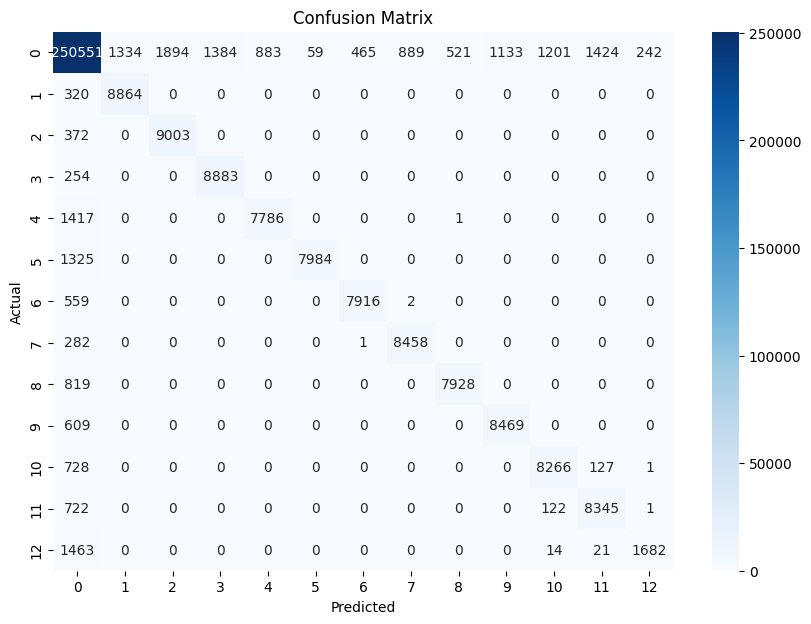

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
